In [1]:
import pandas as pd

# Read the original dataset for the current season
results = pd.read_csv("Result_Premier_2223.csv", index_col=0)

# Store the original column order
original_columns = results.columns.tolist()

# Reset index to prepare for melt
df_reset = results.reset_index()

# Melt the DataFrame into a long format
melted_df = df_reset.melt(id_vars=df_reset.columns[0], var_name='Away', value_name='Score')

# Rename the first column to 'Home'
melted_df.rename(columns={melted_df.columns[0]: 'Home'}, inplace=True)

# Add season column - Change with each season's dataset
melted_df['Season'] = '2022-2023'

# Pivot the DataFrame
pivot_dfs = melted_df.pivot(index='Home', columns='Away', values='Score')

# Reorder the columns based on the original dataset
pivot_dfs = pivot_dfs[original_columns]

# Display the reordered pivoted DataFrame
print(pivot_dfs.head())



Away                    ARS   AVL   BOU   BRE   BHA   CHE   CRY   EVE   FUL   \
Home                                                                           
Arsenal                  NaN  2~1    3~2   1~1   0~3   3~1   4~1   4~0  2~1    
Aston Villa              2~4   NaN   3~0  4~0    2~1  0~2    1~0  2~1    1~0   
Bournemouth             0~3   2~0    NaN  0~0    0~2   1~3  0~2   3~0    2~1   
Brentford               0~3    1~1  2~0    NaN  2~0   0~0    1~1  1~1    3~2   
Brighton & Hove Albion  2~4   1~2    1~0   3~3   NaN  4~1    1~0   1~5   0~1   

Away                    LEE   LEI   LIV   MCI   MUN   NEW   NFO   SOU   TOT   \
Home                                                                           
Arsenal                  4~1  4~2   3~2    1~3  3~2   0~0   5~0    3~3  3~1    
Aston Villa             2~1    2~4  1~3   1~1   3~1    3~0   2~0  1~0    2~1   
Bournemouth              4~1  2~1    1~0   1~4   0~1   1~1  1~1   0~1   2~3    
Brentford               5~2    1~1  3~1

In [2]:
import numpy as np

# Modify the function to convert a score to a more detailed result
def score_to_result_with_goal_diff(score):
    if isinstance(score, float) or "~" not in score:  # Diagonal, missing entries, or unexpected format
        return 0  # Draw
    home, away = score.split("~")
    try:
        home, away = int(home.strip()), int(away.strip())
    except ValueError:  # In case of unexpected characters in the score
        return 0  # Draw
    
    goal_diff = home - away
    
    if goal_diff >= 3:
        return 1  # Strong win
    elif 1 <= goal_diff <= 2:
        return 2  # Moderate win
    elif goal_diff == 0:
        return 3  # Draw
    elif -2 <= goal_diff <= -1:
        return 4  # Moderate loss
    else:
        return 5  # Strong loss


# Number of teams
N = pivot_dfs.shape[0]

# Initialize the results matrix
R = np.zeros((N, N), dtype=int)

# Populate the results matrix
for i in range(N):
    for j in range(N):
        R[i, j] = score_to_result_with_goal_diff(pivot_dfs.iloc[i, j])

# The adjacency matrix R now contains the match outcomes for the 2003-2004 season
print(R)


[[0 2 2 3 5 2 1 1 2 1 2 2 4 2 3 1 3 2 2 1]
 [4 0 1 1 2 4 2 2 2 2 4 4 3 2 1 2 2 2 4 3]
 [5 2 0 3 4 4 4 1 2 1 2 2 5 4 3 3 4 4 5 3]
 [5 3 2 0 2 3 3 3 2 1 3 2 2 1 4 2 1 3 2 3]
 [4 4 2 3 0 1 2 5 4 2 1 1 3 2 3 3 2 4 1 1]
 [4 4 2 4 4 0 2 3 3 2 2 3 4 3 3 3 4 3 2 1]
 [4 2 2 3 3 4 0 3 5 2 2 3 4 3 3 3 2 5 2 2]
 [2 2 2 2 5 4 1 0 4 2 4 3 5 4 5 3 4 3 2 4]
 [5 1 3 2 2 2 3 3 0 2 2 3 4 4 5 2 2 4 4 3]
 [4 3 2 3 3 1 5 3 4 0 3 5 4 4 3 2 2 5 3 2]
 [4 4 4 3 3 4 3 3 4 2 0 5 4 4 5 1 4 1 2 2]
 [3 3 1 2 3 3 3 2 2 4 2 0 2 1 2 2 2 2 2 2]
 [1 2 1 4 2 2 2 3 2 2 2 1 0 1 2 1 1 2 1 1]
 [2 2 1 2 4 1 2 2 2 3 1 2 2 0 3 1 3 2 2 2]
 [4 1 3 1 1 2 3 2 2 3 3 4 3 2 0 2 2 1 3 2]
 [2 3 4 3 2 3 2 3 4 2 2 2 3 4 4 0 2 4 2 3]
 [3 4 4 4 4 2 4 4 4 3 2 3 5 4 5 4 0 3 3 4]
 [4 4 4 4 2 2 2 2 2 2 1 4 2 3 4 2 1 0 2 2]
 [3 3 2 4 4 3 4 2 2 2 4 4 4 2 5 1 2 3 0 2]
 [4 2 4 2 4 2 2 3 3 4 5 1 5 4 3 2 2 2 2 0]]


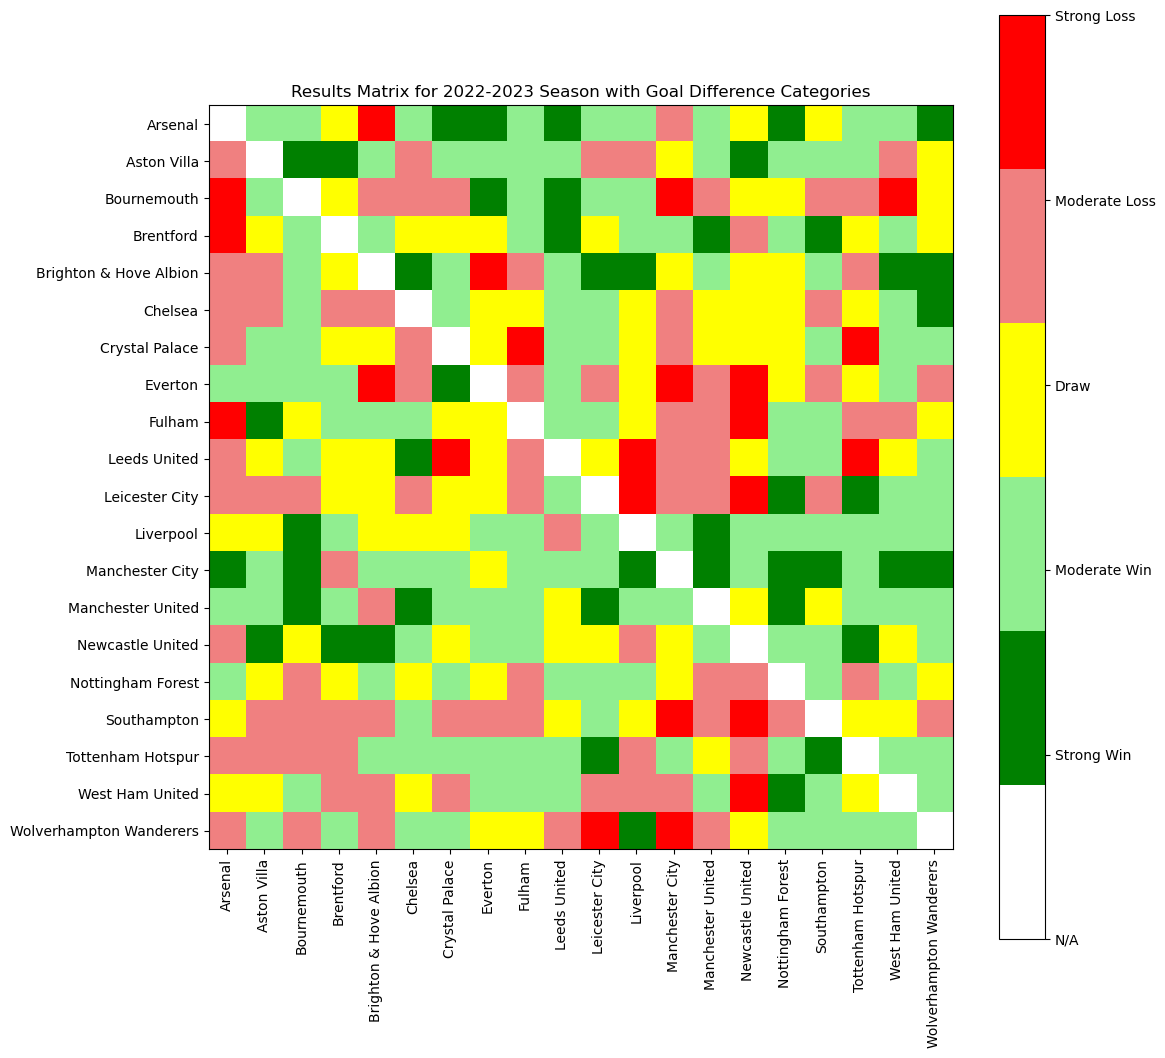

In [3]:
import matplotlib.pyplot as plt

# Create a colormap based on the new results matrix with goal difference categories
cmap = plt.cm.colors.ListedColormap(['white','green', 'lightgreen', 'yellow', 'lightcoral', 'red'])

# Plot the matrix using the colormap
plt.figure(figsize=(12, 12))
plt.imshow(R, cmap=cmap, vmin=0, vmax=5)  # vmin and vmax set to match our new encoding
plt.title("Results Matrix for 2022-2023 Season with Goal Difference Categories")
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A', 'Strong Win', 'Moderate Win','Draw', 'Moderate Loss', 'Strong Loss'])
plt.xticks(ticks=np.arange(N), labels=pivot_dfs.index, rotation=90)
plt.yticks(ticks=np.arange(N), labels=pivot_dfs.index)
plt.grid(False)
plt.show()


In [4]:
# Load the EPL Standings dataset
epl_standings = pd.read_csv("EPL Standings 2000-2023.csv")

# Extract the team names for the current season from the original dataset
teams_current = pivot_dfs.index.tolist()


# Extract the points table for the previous season
points_table_prev = epl_standings[epl_standings['Season'] == '2021-22'].sort_values(by='Pos')

# Filter out the bottom 3 teams (usually relegated)
points_table_prev_filtered = points_table_prev[:-3]

# Initialize z based on these blocks
z_initial = np.zeros(len(teams_current), dtype=int)

# Initialize counter variable
counter = 0

# List to keep track of assigned teams
assigned_teams = []

# Assign block numbers based on the sorted positions in the points table
for i, row in points_table_prev_filtered.iterrows():
    team = row['Team']
    if counter < 10:
        block = 0
    else:
        block = 1
    
    if team in teams_current:  # This check ensures that the team is in the current season
        z_initial[teams_current.index(team)] = block
        print(f"Assigning {team} to block {block}")  # Debugging line
        assigned_teams.append(team)

    # Increment the counter
    counter += 1

# Assign new teams to block 1
new_teams = [team for team in teams_current if team not in assigned_teams]
for team in new_teams:
    z_initial[teams_current.index(team)] = 1
    print(f"Assigning new team {team} to block 1")  # Debugging line

# Display the initial z values
z_initial


Assigning Manchester City to block 0
Assigning Liverpool to block 0
Assigning Chelsea to block 0
Assigning Tottenham Hotspur to block 0
Assigning Arsenal to block 0
Assigning Manchester United to block 0
Assigning West Ham United to block 0
Assigning Leicester City to block 0
Assigning Brighton & Hove Albion to block 0
Assigning Wolverhampton Wanderers to block 0
Assigning Newcastle United to block 1
Assigning Crystal Palace to block 1
Assigning Brentford to block 1
Assigning Aston Villa to block 1
Assigning Southampton to block 1
Assigning Everton to block 1
Assigning Leeds United to block 1
Assigning new team Bournemouth to block 1
Assigning new team Fulham to block 1
Assigning new team Nottingham Forest to block 1


array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [5]:
# Initialize necessary parameters for Gibbs sampling
N = pivot_dfs.shape[0]  # Number of teams
K = 2  # Number of blocks
num_categories = 5  # Number of outcome categories based on goal difference
# Initialize p based on 2002-2003 season matches and the blocks
counts = np.zeros((K, K, 5))  

# Make sure to use 'teams_current' instead of 'teams_0203' if that's your updated list
for i, team_i in enumerate(teams_current):
    for j, team_j in enumerate(teams_current):
        if i != j:
            result = R[i, j] - 1  # Shifting the range down to [0, 4]
  # Assuming R is your results matrix mapped to the range [0, 4]
            block_i = z_initial[i]
            block_j = z_initial[j]
            counts[block_i, block_j, result] += 1
                        

# Normalize to get probabilities
p_initial = counts / counts.sum(axis=2, keepdims=True)

# Calculate the sum along axis 2 after the initial normalization
sums_after_initial_normalization = p_initial.sum(axis=2, keepdims=True)

# Re-normalize
p_initial = p_initial / sums_after_initial_normalization

# Handle possible NaN values by setting them to 1/5
p_initial = np.nan_to_num(p_initial, nan=1.0 / 5)
p_initial


array([[[0.2       , 0.4       , 0.13333333, 0.22222222, 0.04444444],
        [0.13      , 0.42      , 0.23      , 0.19      , 0.03      ]],

       [[0.04      , 0.28      , 0.27      , 0.3       , 0.11      ],
        [0.12222222, 0.36666667, 0.27777778, 0.17777778, 0.05555556]]])

In [6]:
# Function to compute log likelihood for the Stochastic Block Model with goal difference
def compute_log_likelihood(R, z, p, num_categories):
    N = R.shape[0]
    log_likelihood = 0
    for i in range(N):
        for j in range(N):
            if R[i, j] > 0:
                log_likelihood += np.log(p[z[i], z[j], R[i, j] - 1])
    return log_likelihood


# Function to update block interaction probabilities
def update_probabilities(R, z, K, num_categories):
    counts = np.zeros((K, K, num_categories))
    N = R.shape[0]
    for i in range(N):
        for j in range(N):
            if i != j:
                counts[z[i], z[j], R[i, j] - 1] += 1
    p_new = counts / counts.sum(axis=-1, keepdims=True)
    return np.nan_to_num(p_new, nan=1.0 / num_categories)

C:\Users\arunr\AppData\Local\Temp\ipykernel_8004\2296384222.py:20: RuntimeWarning: invalid value encountered in divide
  p_new = counts / counts.sum(axis=-1, keepdims=True)


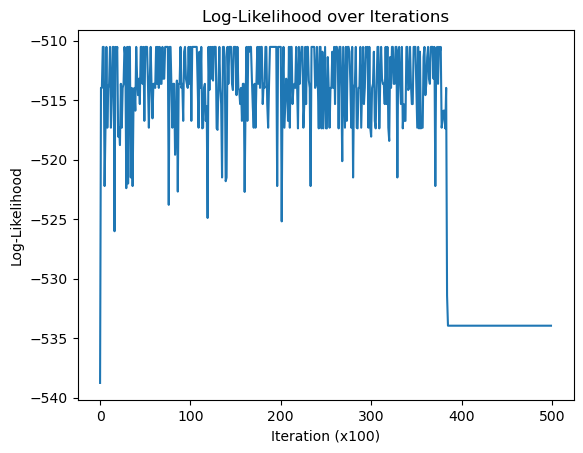

In [7]:
# Gibbs sampling function for the new categories
def gibbs_sampling(R, z_initial, p_initial, K, num_iterations, num_categories, burn_in, thinning):
    np.random.seed(42)
    N = R.shape[0]
    z_samples = []
    p_samples = []
    log_likelihoods = []
    z_current = z_initial.copy()
    p_current = p_initial.copy()
    epsilon = 1e-10
    for it in range(num_iterations):
        for i in range(N):
            p_zi = np.zeros(K)
            for k in range(K):
                log_p_zi_k = epsilon
                for j in range(N):
                    if i != j:
                        log_p_zi_k += np.log(p_current[k, z_current[j], R[i, j] - 1] + epsilon)
                p_zi[k] = np.exp(log_p_zi_k)
            if np.sum(p_zi) == 0:
                print("Warning: p_zi sum is zero. Debug required.")
                p_zi += epsilon
            p_zi /= np.sum(p_zi)
            z_current[i] = np.random.choice(K, p=p_zi)
        p_current = update_probabilities(R, z_current, K, num_categories)
        if it % 100 == 0:
            log_likelihood = compute_log_likelihood(R, z_current, p_current, num_categories)
            log_likelihoods.append(log_likelihood)
        if it >= burn_in and (it - burn_in) % thinning == 0:
            z_samples.append(z_current.copy())
            p_samples.append(p_current.copy())
    return z_samples, p_samples, log_likelihoods


# Define the number of Gibbs sampling iterations, burn-in period, and thinning interval
num_iterations = 50000
burn_in = 10000
thinning = 5

# Run Gibbs sampling
z_samples, p_samples, log_likelihoods = gibbs_sampling(
    R, z_initial, p_initial, K, num_iterations, num_categories, burn_in, thinning)

# Plotting the log-likelihoods
plt.plot(log_likelihoods)
plt.xlabel('Iteration (x100)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over Iterations')
plt.show()

In [8]:
# Modify the function to estimate block interaction probabilities p based on Gibbs samples of z for the new categories
def estimate_p(R, z_samples, K, num_categories):
    
    #Estimate the block interaction probabilities p based on Gibbs samples of z for the new categories.
    # Initialize counts for the block interactions
    counts = np.zeros((K, K, num_categories))

    # Go through each sample of z and count the block interactions
    for z in z_samples:
        for i in range(N):
            for j in range(N):
                if i != j:  # Ignore diagonal
                    counts[z[i], z[j], R[i, j] - 1] += 1

    # Convert counts to probabilities
    p_estimate = counts / counts.sum(axis=-1, keepdims=True)
    
    return p_estimate

# Estimate block interaction probabilities p for the new categories
p_estimate = estimate_p(R, z_samples, K, num_categories)
p_estimate


array([[[0.18732904, 0.39866482, 0.18618154, 0.19891964, 0.02890495],
        [0.2318619 , 0.50699223, 0.19384465, 0.05813062, 0.00917061]],

       [[0.03847737, 0.16368446, 0.28696753, 0.36192688, 0.14894376],
        [0.0896623 , 0.38650071, 0.22927798, 0.24353177, 0.05102724]]])

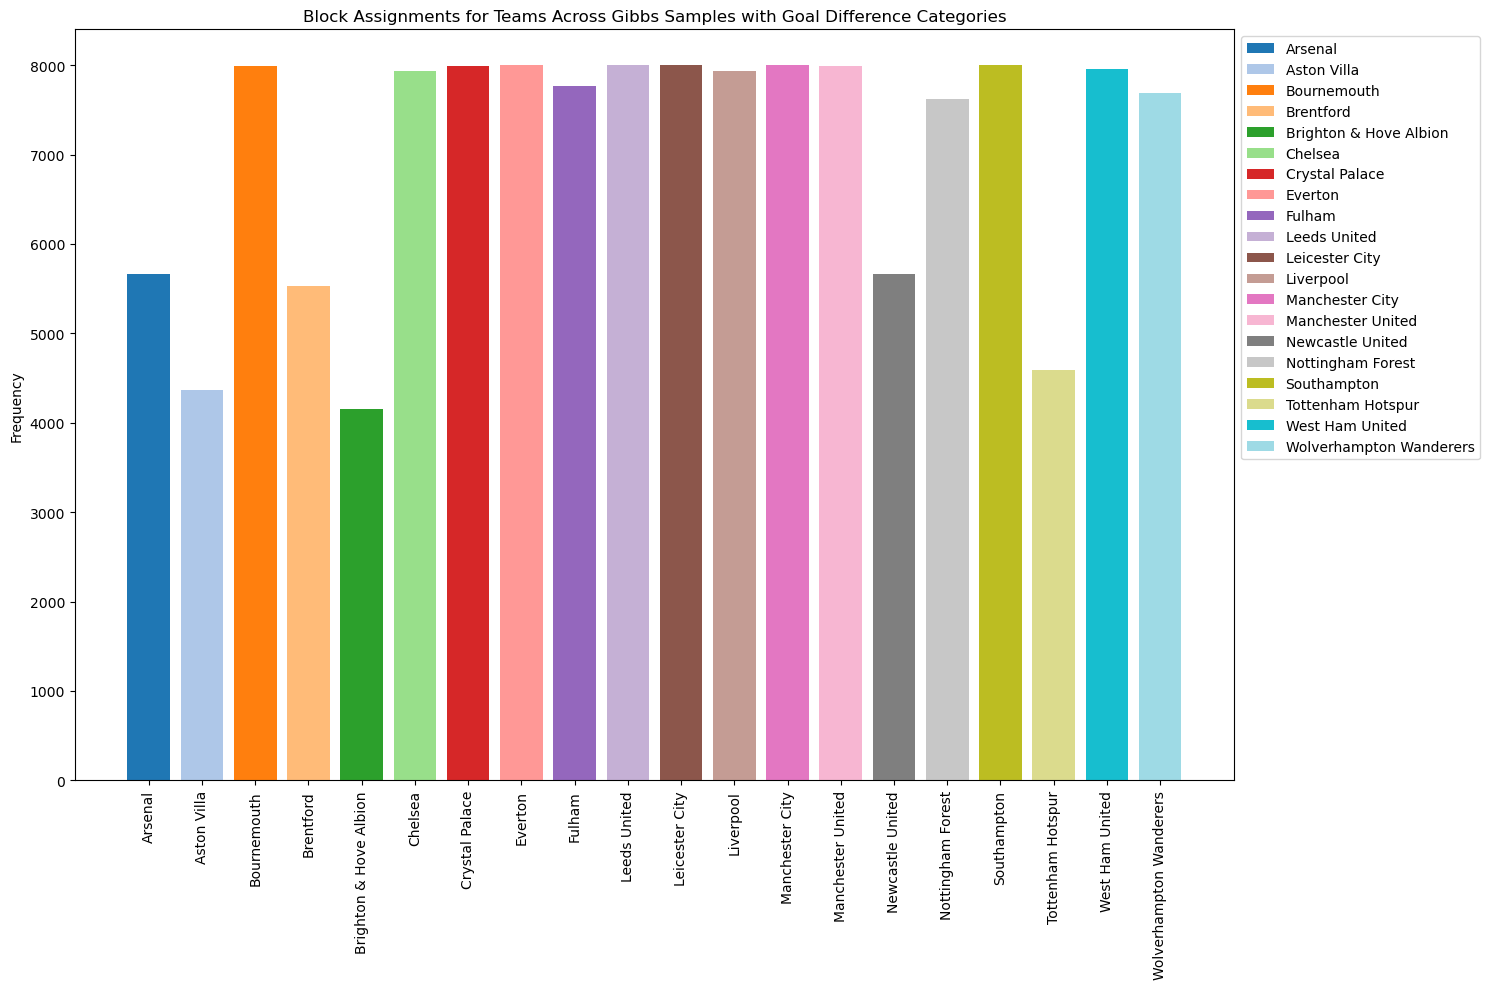

In [9]:
from itertools import permutations
from scipy.spatial import distance

# Function for label switching correction for the new categories
def label_switching_correction(z_samples, K):
    corrected_samples = [z_samples[0]]  # First sample remains unchanged
    
    for z_current, z_next in zip(z_samples[:-1], z_samples[1:]):
        best_permutation = None
        best_distance = float('inf')
        
        # Check all possible permutations of labels
        for perm in permutations(range(K)):
            z_permuted = np.array([perm[z] for z in z_next])
            dist = distance.hamming(z_current, z_permuted)
            
            if dist < best_distance:
                best_distance = dist
                best_permutation = z_permuted
        
        corrected_samples.append(best_permutation)
    
    return corrected_samples

# Function to plot block assignments for the new categories
def plot_block_assignments(z_corrected_samples, team_names, K):
    block_counts = np.zeros((len(team_names), K))
    for z in z_corrected_samples:
        for i, block in enumerate(z):
            block_counts[i, block] += 1

    plt.figure(figsize=(15, 10))
    for i, team in enumerate(team_names):
        plt.bar(i, block_counts[i].max(), label=team, tick_label=team, color=plt.cm.tab20(i / len(team_names)))

    plt.xticks(np.arange(len(team_names)), team_names, rotation=90)
    plt.ylabel("Frequency")
    plt.title("Block Assignments for Teams Across Gibbs Samples with Goal Difference Categories")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Apply label switching correction to the new samples
z_corrected_samples = label_switching_correction(z_samples, K)

# Plot block assignments for teams based on new samples
plot_block_assignments(z_corrected_samples, pivot_dfs.index, K)


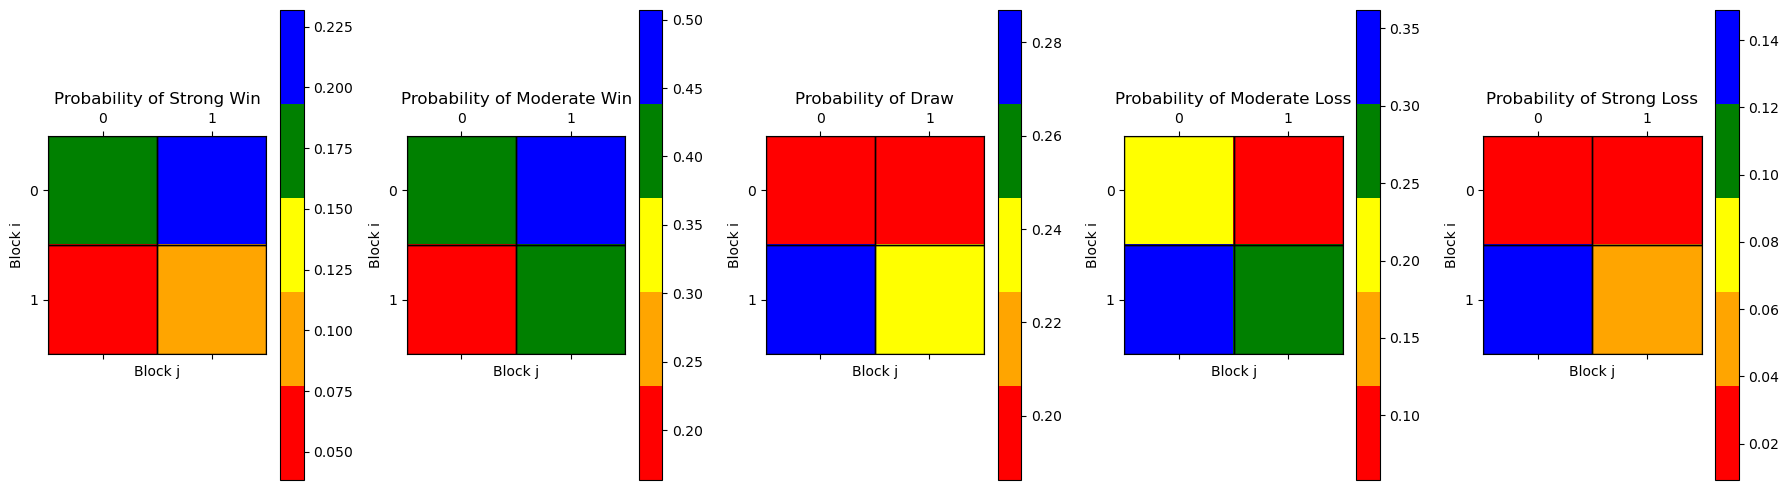

In [10]:
import matplotlib.patches as patches
import matplotlib.colors as mcolors

def plot_heatmaps(p_estimate, outcome_labels):
    # Create a custom colormap with distinct colors
    distinct_colors = ['red', 'orange', 'yellow', 'green', 'blue']
    cmap = mcolors.ListedColormap(distinct_colors)

    fig, axes = plt.subplots(1, p_estimate.shape[2], figsize=(18, 5))

    for i, label in enumerate(outcome_labels):
        ax = axes[i]
        cax = ax.matshow(p_estimate[:, :, i], cmap=cmap)
        
        # Adding borders
        for x in range(p_estimate[:, :, i].shape[0]):
            for y in range(p_estimate[:, :, i].shape[1]):
                rect = patches.Rectangle((y-0.5, x-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
                ax.add_patch(rect)
                
        ax.set_title(f"Probability of {label}")
        ax.set_xlabel("Block j")
        ax.set_ylabel("Block i")
        fig.colorbar(cax, ax=ax)

    plt.tight_layout()
    plt.show()

# Assuming you have defined or imported 'estimate_p' and 'z_corrected_samples' somewhere
# p_estimate = estimate_p(R, z_corrected_samples, K, num_categories)

# Define new outcome labels based on the new categories
outcome_labels = ["Strong Win", "Moderate Win", "Draw", "Moderate Loss", "Strong Loss"]

# Plot the heatmaps for the new categories
plot_heatmaps(p_estimate, outcome_labels)



In [11]:
# Function to list teams by block for the new categories
def list_teams_by_block(z_corrected_samples, team_names, K):
    
    #Identify which teams are most frequently assigned to each block for the new categories.
    
    # Count the block assignments for each team
    block_counts = np.zeros((len(team_names), K))
    for z in z_corrected_samples:
        for i, block in enumerate(z):
            block_counts[i, block] += 1

    # Identify the most frequent block for each team
    most_frequent_blocks = block_counts.argmax(axis=1)
    
    # List teams by block
    teams_by_block = {k: [] for k in range(K)}
    for i, block in enumerate(most_frequent_blocks):
        teams_by_block[block].append(team_names[i])
    
    return teams_by_block

# List the teams most frequently assigned to each block for the new categories
teams_by_block = list_teams_by_block(z_corrected_samples, pivot_dfs.index, K)
teams_by_block


{0: ['Arsenal',
  'Aston Villa',
  'Brentford',
  'Brighton & Hove Albion',
  'Liverpool',
  'Manchester City',
  'Manchester United',
  'Newcastle United'],
 1: ['Bournemouth',
  'Chelsea',
  'Crystal Palace',
  'Everton',
  'Fulham',
  'Leeds United',
  'Leicester City',
  'Nottingham Forest',
  'Southampton',
  'Tottenham Hotspur',
  'West Ham United',
  'Wolverhampton Wanderers']}

<Figure size 1500x1000 with 0 Axes>

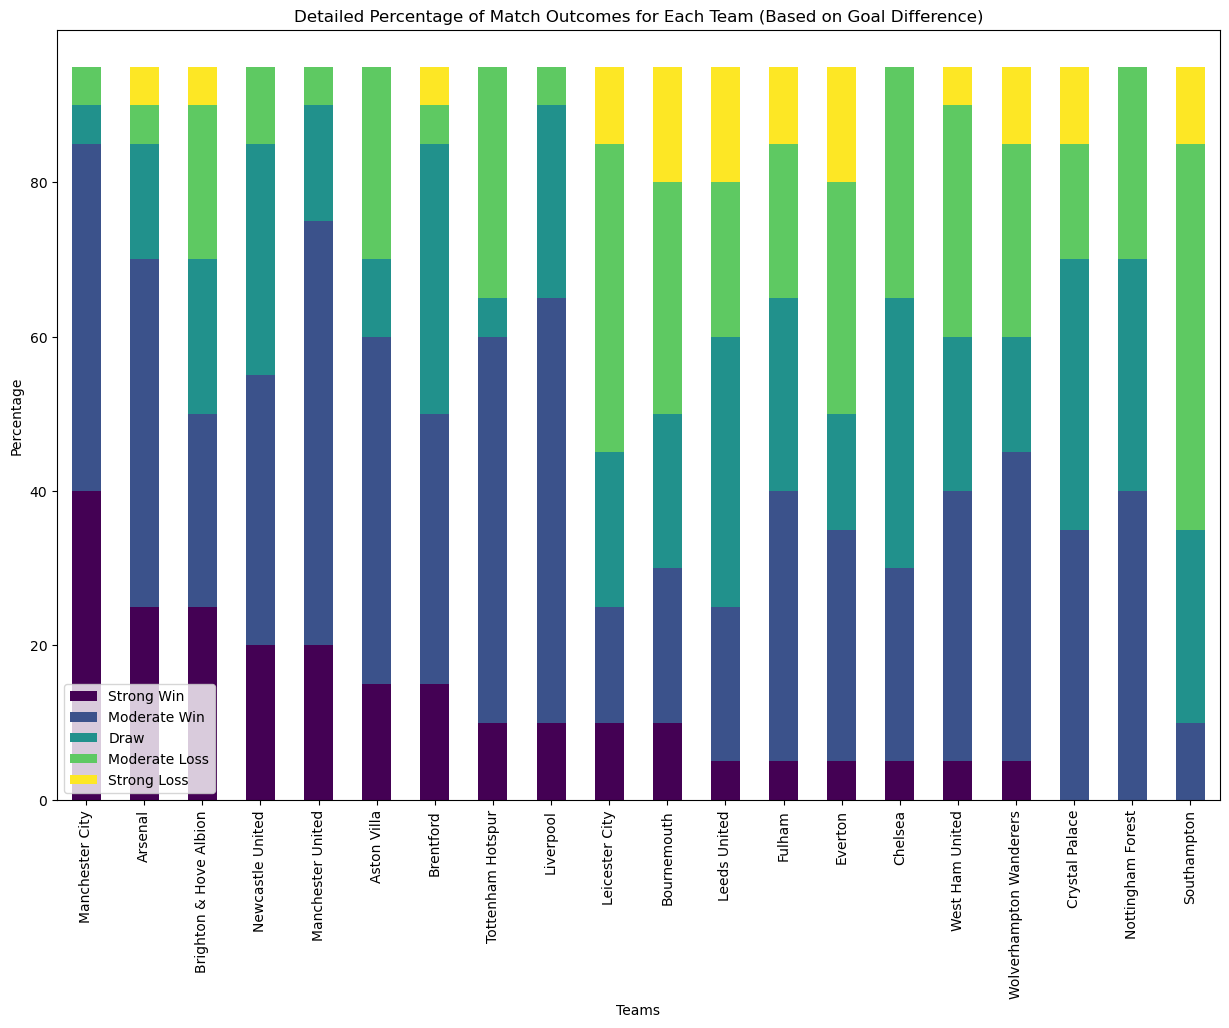

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume R is your results matrix, and pivot_dfs is your DataFrame containing team names
# Also assume N is the number of teams and num_categories is the number of result categories

# Convert the results matrix R back to the new categories
results_df = pd.DataFrame(R, index=pivot_dfs.index, columns=pivot_dfs.columns)

# Initialize counters for each category
category_counts = {i: (results_df == i).sum(axis=1) for i in range(num_categories)}

# Calculate percentages
category_percentages = {f'Category {i}': category_counts[i] / N * 100 for i in range(num_categories)}

# Combine the percentages into a DataFrame
percentage_df = pd.DataFrame(category_percentages)

# Calculate percentages for each category based on goal difference
category_percentages = {
    'Strong Win': (results_df == 1).sum(axis=1) / N * 100,
    'Moderate Win': (results_df == 2).sum(axis=1) / N * 100,
    'Draw': (results_df == 3).sum(axis=1) / N * 100,
    'Moderate Loss': (results_df == 4).sum(axis=1) / N * 100,
    'Strong Loss': (results_df == 5).sum(axis=1) / N * 100,
}

# Combine the percentages into a DataFrame
detailed_percentage_df = pd.DataFrame(category_percentages)

# Order by position in the final league table (assuming higher win percentage indicates higher position)
detailed_percentage_df = detailed_percentage_df.sort_values(by='Strong Win', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
detailed_percentage_df.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title("Detailed Percentage of Match Outcomes for Each Team (Based on Goal Difference)")
plt.ylabel("Percentage")
plt.xlabel("Teams")
plt.show()


In [13]:
# Initialize an empty dictionary for the mapping
team_name_mapping = {}

# Loop through the full team names and abbreviations to fill the mapping
for full_name, abbr in zip(pivot_dfs.index, pivot_dfs.columns):
    team_name_mapping[full_name] = abbr

# Initialize a DataFrame to store the points for each team
team_points_df = pd.DataFrame(index=pivot_dfs.index, columns=['Points'])
team_points_df['Points'] = 0  # Initialize all points to 0

# Calculate the points for each team
for home_team in pivot_dfs.index:
    for away_team_abbr in pivot_dfs.columns:
        score = pivot_dfs.loc[home_team, away_team_abbr]
        if pd.isna(score) or "~" not in score:  # Skip missing or invalid entries
            continue
        try:
            home_goals, away_goals = map(int, score.split("~"))
        except ValueError:  # Skip if goals are not integers (malformed entries)
            continue

        # Assign points based on match outcome
        if home_goals > away_goals:  # Home win
            team_points_df.loc[home_team, 'Points'] += 3
        elif home_goals == away_goals:  # Draw
            team_points_df.loc[home_team, 'Points'] += 1
            away_team = [key for key, value in team_name_mapping.items() if value == away_team_abbr][0]
            team_points_df.loc[away_team, 'Points'] += 1
        else:  # Away win
            away_team = [key for key, value in team_name_mapping.items() if value == away_team_abbr][0]
            team_points_df.loc[away_team, 'Points'] += 3

# Sort by points to verify
team_points_df = team_points_df.sort_values(by='Points', ascending=False)

team_points_df


,Points
Home,
Manchester City,89
Arsenal,84
Manchester United,75
Newcastle United,71
Liverpool,67
Brighton & Hove Albion,62
Tottenham Hotspur,60
Brentford,59
Aston Villa,58


In [14]:
# Initialize a dictionary to store the mapping from team to block (cluster)
team_to_block = {}

# Map the team names to their corresponding clusters (blocks)
for block, teams in teams_by_block.items():
    for team in teams:
        team_to_block[team] = block

# Add the cluster assignments to the team_points_df
team_points_df['Cluster'] = team_points_df.index.map(team_to_block)

# Calculate the average points for each cluster
cluster_average_points = team_points_df.groupby('Cluster')['Points'].mean().sort_values(ascending=False)

# Generate cluster ranking based on average points
cluster_ranking = cluster_average_points.index.tolist()

cluster_average_points, cluster_ranking


(Cluster
 0    70.625000
 1    40.666667
 Name: Points, dtype: float64,
 [0, 1])

In [15]:
# Initialize counters for total inter-cluster matches and upsets
total_inter_cluster_matches = 0
total_upsets = 0

# Loop through each match to identify inter-cluster matches and upsets
for home_team in pivot_dfs.index:
    home_team_cluster = team_to_block.get(home_team, None)  # Use get method to avoid KeyError
    if home_team_cluster is None:  # Skip if team has not been assigned a cluster
        continue
    
    for away_team_abbr in pivot_dfs.columns:
        away_team = [key for key, value in team_name_mapping.items() if value == away_team_abbr][0]
        away_team_cluster = team_to_block.get(away_team, None)  # Use get method to avoid KeyError
        
        if away_team_cluster is None:  # Skip if team has not been assigned a cluster
            continue
        
        # Skip if it's not an inter-cluster match
        if home_team_cluster == away_team_cluster:
            continue
        
        total_inter_cluster_matches += 1
        
        score = pivot_dfs.loc[home_team, away_team_abbr]
        if pd.isna(score) or "~" not in score:  # Skip missing or invalid entries
            continue
        
        try:
            home_goals, away_goals = map(int, score.split("~"))
        except ValueError:  # Skip if goals are not integers (malformed entries)
            continue
        
        # Check if it's an upset (lower-ranked cluster's team wins)
        if home_goals > away_goals and cluster_ranking.index(home_team_cluster) > cluster_ranking.index(away_team_cluster):
            total_upsets += 1
        elif away_goals > home_goals and cluster_ranking.index(away_team_cluster) > cluster_ranking.index(home_team_cluster):
            total_upsets += 1

# Calculate the Inter-Cluster Upset Rate
if total_inter_cluster_matches > 0:
    inter_cluster_upset_rate = total_upsets / total_inter_cluster_matches
else:
    inter_cluster_upset_rate = "N/A (No inter-cluster matches found)"

total_inter_cluster_matches, total_upsets, inter_cluster_upset_rate



(192, 25, 0.13020833333333334)

In [16]:
def calculate_dominance_measure(p_estimate):
    # Identify the larger and smaller blocks based on the probabilities matrix
    larger_block = 0 if p_estimate[0, 1].sum() > p_estimate[1, 0].sum() else 1
    smaller_block = 1 - larger_block
    
    # Calculate the average probability of a "Strong Win" for the larger block against the smaller block
    # Note: In the new scheme, "Strong Win" is represented by 1, so the index should be 1.
    strong_win_probability = p_estimate[larger_block, smaller_block, 1]
    
    return strong_win_probability

# Assuming p_estimate is defined and contains the estimated probabilities
dominance_measure = calculate_dominance_measure(p_estimate)
dominance_measure


0.16368446068970124

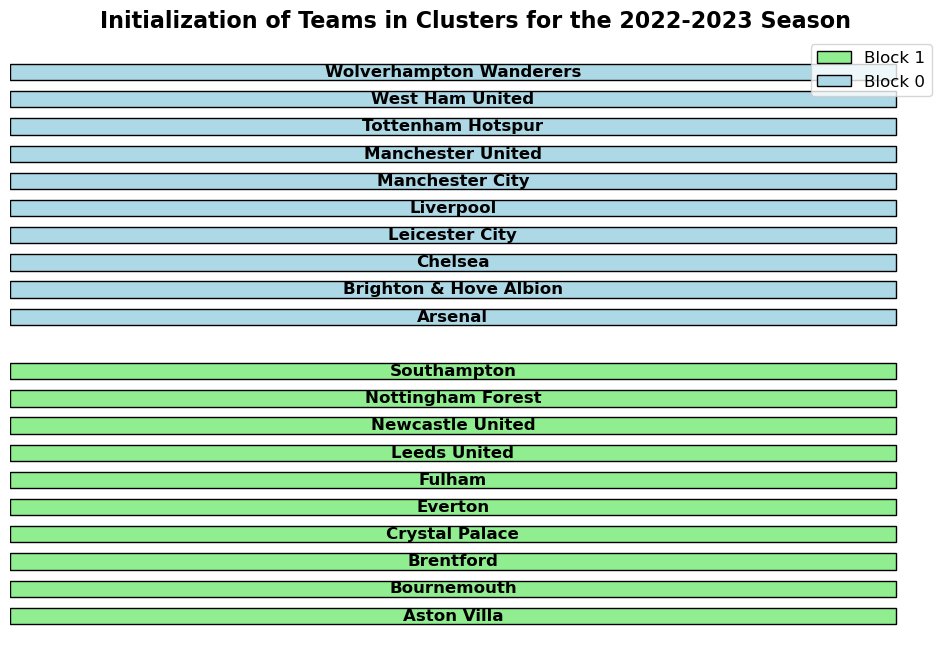

In [17]:

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Create a pictorial representation of teams in each block

# Extract teams for each block
block_0_teams = [team for i, team in enumerate(teams_current) if z_initial[i] == 0]
block_1_teams = [team for i, team in enumerate(teams_current) if z_initial[i] == 1]


# Read data and preprocess (assuming necessary data is already loaded into variables)

# Create a visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Define blocks, labels, and colors
blocks = [block_0_teams, block_1_teams][::-1]  # Reversed order to have Block 0 on top
labels = ['Block 0', 'Block 1'][::-1]
colors = ['lightblue', 'lightgreen'][::-1]

# Plot teams in each block with Block 0 on top
cumulative_y_pos = 0
for i, block in enumerate(blocks):
    y_pos = np.arange(len(block))
    ax.barh(y_pos + cumulative_y_pos, [1] * len(block), color=colors[i], edgecolor='black', height=0.6)
    for j, team in enumerate(block):
        ax.text(0.5, y_pos[j] + cumulative_y_pos, team, ha='center', va='center', fontsize=12, fontweight='bold', color='black')
    cumulative_y_pos += len(block) + 1  # Increment to adjust position for next block

# Styling
ax.set_yticks([])  # remove y-ticks
ax.set_xticks([])  # remove x-ticks
ax.spines['right'].set_visible(False)  # remove right spine
ax.spines['left'].set_visible(False)   # remove left spine
ax.spines['top'].set_visible(False)    # remove top spine
ax.spines['bottom'].set_visible(False) # remove bottom spine

# Add legend
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=labels[i]) for i in range(2)]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title("Initialization of Teams in Clusters for the 2022-2023 Season", fontsize=16, fontweight='bold')
plt.show()


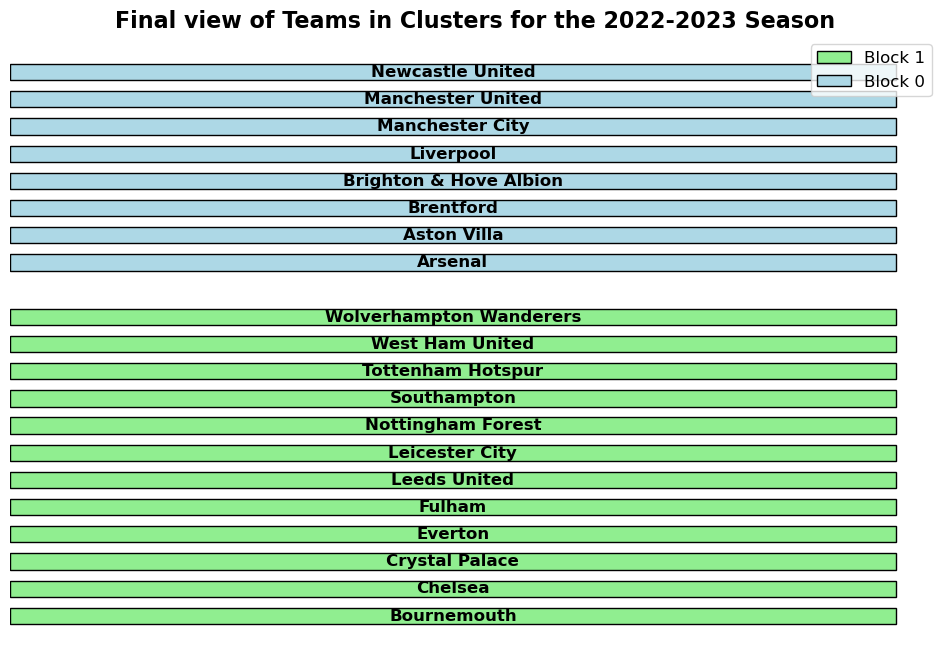

In [18]:

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Extract teams for each block from the final Gibbs sampling
block_0_teams = teams_by_block[0]
block_1_teams = teams_by_block[1]

# Create a visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Define blocks, labels, and colors
blocks = [block_0_teams, block_1_teams][::-1]  # Reversed order to have Block 0 on top
labels = ['Block 0', 'Block 1'][::-1]
colors = ['lightblue', 'lightgreen'][::-1]

# Plot teams in each block with Block 0 on top
cumulative_y_pos = 0
for i, block in enumerate(blocks):
    y_pos = np.arange(len(block))
    ax.barh(y_pos + cumulative_y_pos, [1] * len(block), color=colors[i], edgecolor='black', height=0.6)
    for j, team in enumerate(block):
        ax.text(0.5, y_pos[j] + cumulative_y_pos, team, ha='center', va='center', fontsize=12, fontweight='bold', color='black')
    cumulative_y_pos += len(block) + 1  # Increment to adjust position for next block

# Styling
ax.set_yticks([])  # remove y-ticks
ax.set_xticks([])  # remove x-ticks
ax.spines['right'].set_visible(False)  # remove right spine
ax.spines['left'].set_visible(False)   # remove left spine
ax.spines['top'].set_visible(False)    # remove top spine
ax.spines['bottom'].set_visible(False) # remove bottom spine

# Add legend
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=labels[i]) for i in range(2)]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title("Final view of Teams in Clusters for the 2022-2023 Season", fontsize=16, fontweight='bold')
plt.show()
